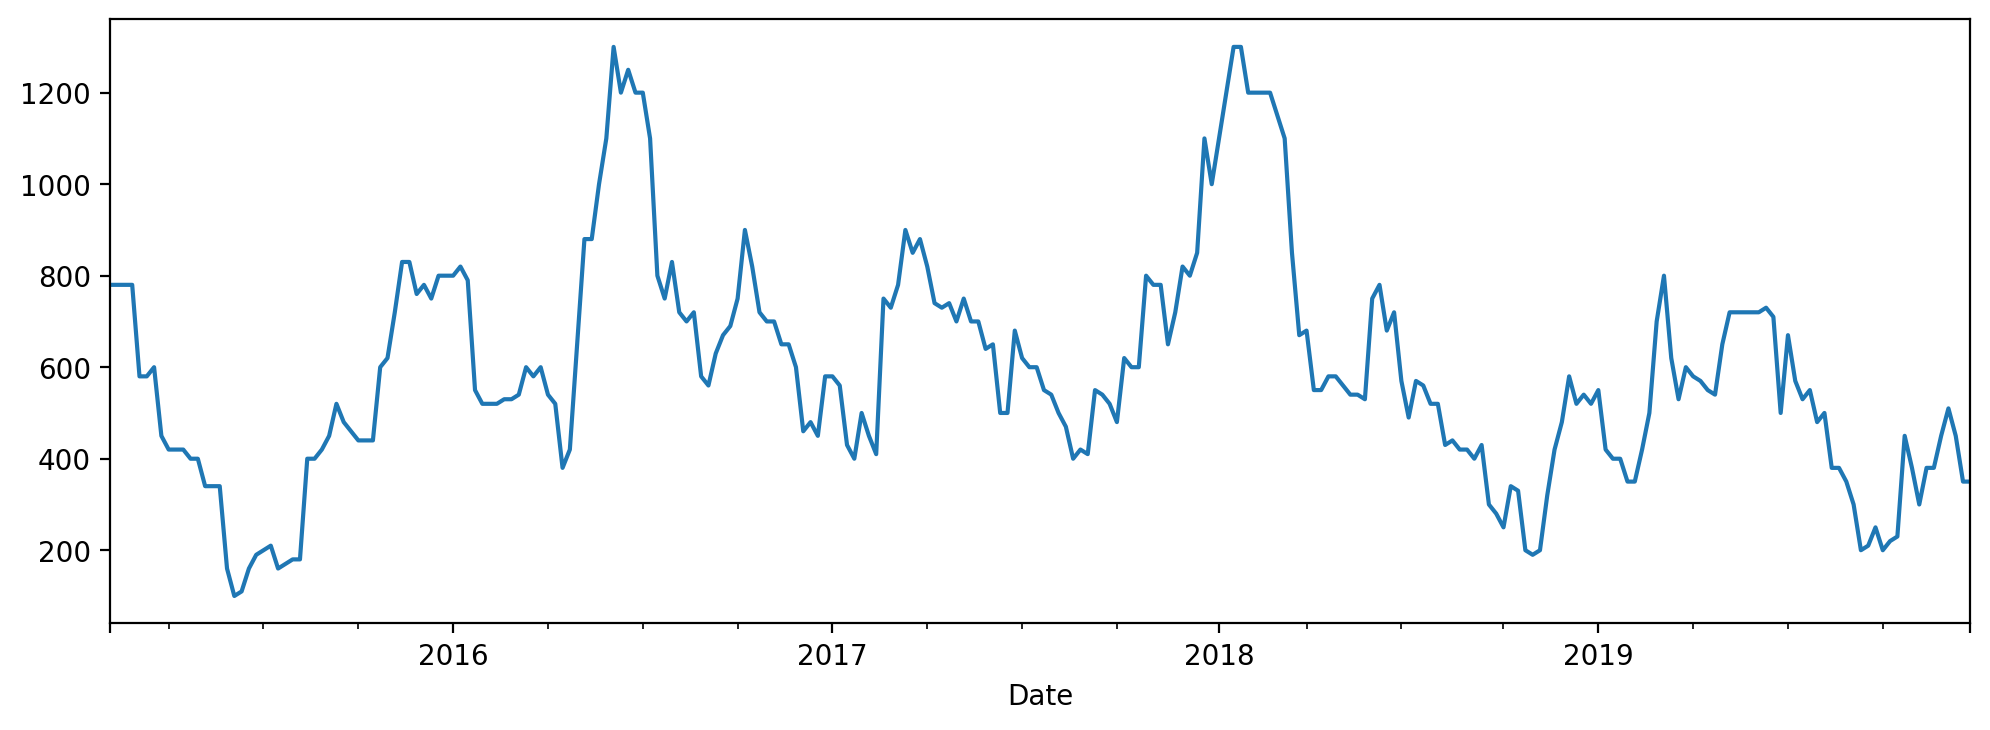

In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib as plt
from matplotlib import pyplot

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import scale

import numpy as np



series = read_csv('SweetPotatos_Price.csv', parse_dates=["Date"], index_col="Date")
series.index
series=series.asfreq("W",method='pad')
series=series.Price.resample('W').mean()
pyplot.figure(figsize=(12,4), dpi=100)
series.plot();

In [3]:
series.tail

<bound method NDFrame.tail of Date
2015-02-08    780
2015-02-15    780
2015-02-22    780
2015-03-01    780
2015-03-08    580
             ... 
2019-12-01    450
2019-12-08    510
2019-12-15    450
2019-12-22    350
2019-12-29    350
Freq: W-SUN, Name: Price, Length: 256, dtype: int64>

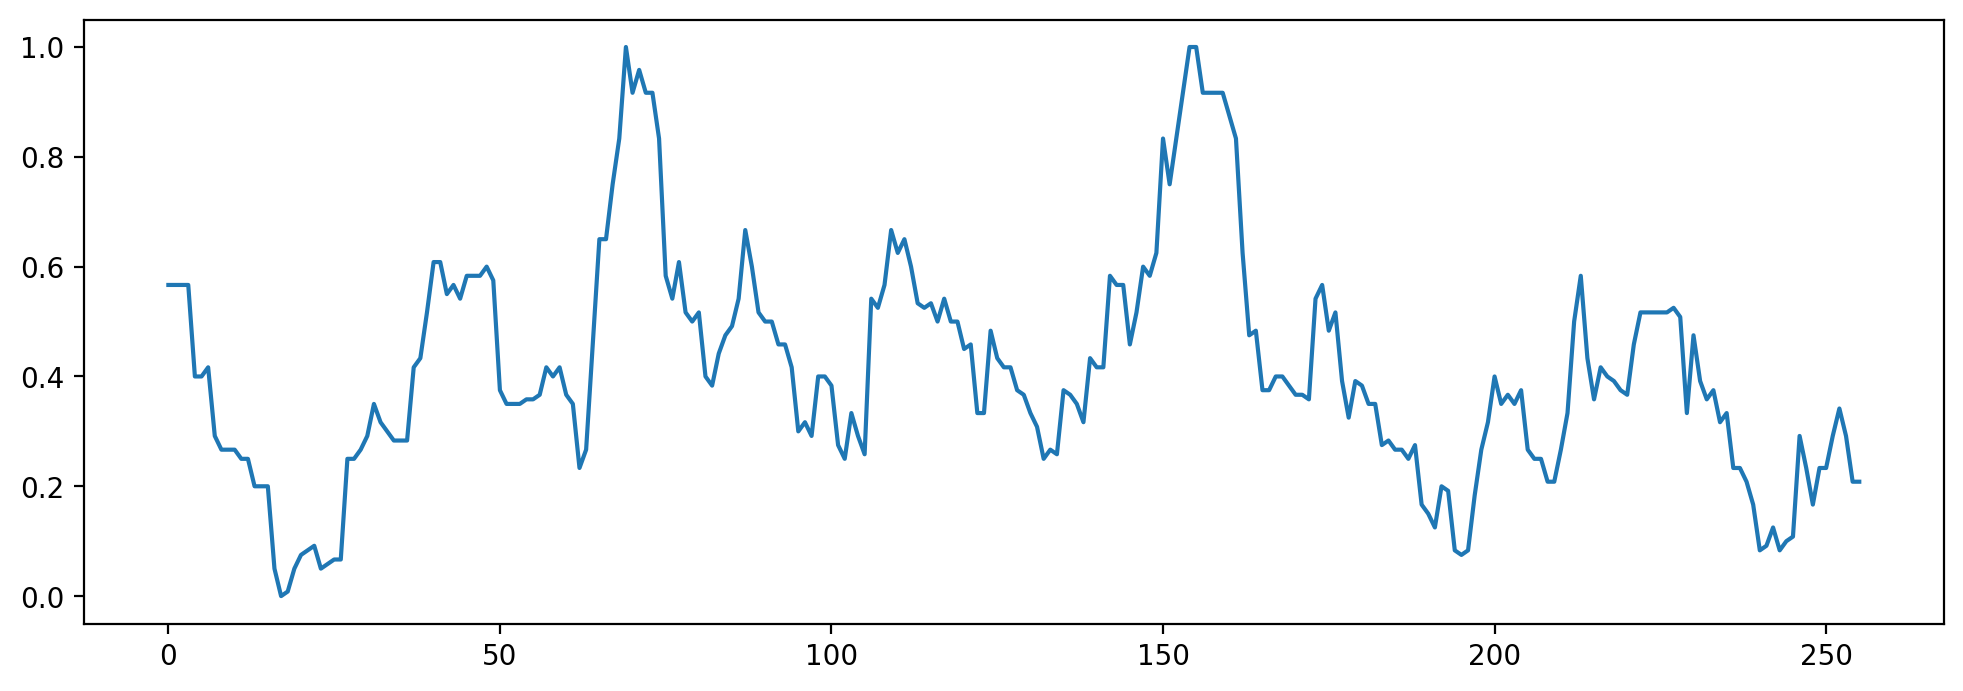

In [2]:
#Initialise the Scaler

s_matrix=series.values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
scaled_series=scaled.fit_transform(s_matrix)
pyplot.figure(figsize=(12,4), dpi=100)
pyplot.plot(scaled_series)
pyplot.show()

In [3]:
##Check stationary with KPSS -> Test statistic > 1, series IS NOT stationary
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(series)

Results of KPSS Test:
Test Statistic            0.18023
p-value                   0.10000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [4]:
#Build model
import math

X=scaled_series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,4))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=0.405935, expected=0.400000


predicted=0.410564, expected=0.383333


predicted=0.395673, expected=0.366667


predicted=0.371345, expected=0.366667


predicted=0.368699, expected=0.358333


predicted=0.359923, expected=0.541667


predicted=0.560542, expected=0.566667


predicted=0.570348, expected=0.483333


predicted=0.504344, expected=0.516667


predicted=0.525873, expected=0.391667


predicted=0.359285, expected=0.325000


predicted=0.318371, expected=0.391667


predicted=0.383006, expected=0.383333


predicted=0.382469, expected=0.350000


predicted=0.372190, expected=0.350000


predicted=0.363718, expected=0.275000


predicted=0.273355, expected=0.283333


predicted=0.292887, expected=0.266667


predicted=0.266211, expected=0.266667


predicted=0.284434, expected=0.250000


predicted=0.264964, expected=0.275000


predicted=0.294803, expected=0.166667


predicted=0.172841, expected=0.150000


predicted=0.171019, expected=0.125000


predicted=0.127044, expected=0.200000


predicted=0.224451, expected=0.191667


predicted=0.212262, expected=0.083333


predicted=0.111377, expected=0.075000


predicted=0.099617, expected=0.083333


predicted=0.089935, expected=0.183333


predicted=0.210882, expected=0.266667


predicted=0.297111, expected=0.316667


predicted=0.354626, expected=0.400000


predicted=0.431469, expected=0.350000


predicted=0.356490, expected=0.366667


predicted=0.380424, expected=0.350000


predicted=0.343181, expected=0.375000


predicted=0.382674, expected=0.266667


predicted=0.264153, expected=0.250000


predicted=0.263507, expected=0.250000


predicted=0.248325, expected=0.208333


predicted=0.215993, expected=0.208333


predicted=0.225781, expected=0.266667


predicted=0.283736, expected=0.333333


predicted=0.353036, expected=0.500000


predicted=0.532022, expected=0.583333


predicted=0.602885, expected=0.433333


predicted=0.437085, expected=0.358333


predicted=0.358800, expected=0.416667


predicted=0.399706, expected=0.400000


predicted=0.382555, expected=0.391667


predicted=0.402875, expected=0.375000


predicted=0.380945, expected=0.366667


predicted=0.371667, expected=0.458333


predicted=0.467249, expected=0.516667


predicted=0.516931, expected=0.516667


predicted=0.523485, expected=0.516667


predicted=0.520283, expected=0.516667


predicted=0.509270, expected=0.516667


predicted=0.506954, expected=0.525000


predicted=0.517182, expected=0.508333


predicted=0.499908, expected=0.333333


predicted=0.315335, expected=0.475000


predicted=0.489517, expected=0.391667


predicted=0.361509, expected=0.358333


predicted=0.377120, expected=0.375000


predicted=0.375684, expected=0.316667


predicted=0.315345, expected=0.333333


predicted=0.343849, expected=0.233333


predicted=0.230463, expected=0.233333


predicted=0.250315, expected=0.208333


predicted=0.209443, expected=0.166667


predicted=0.182642, expected=0.083333


predicted=0.097080, expected=0.091667


predicted=0.112170, expected=0.125000


predicted=0.140578, expected=0.083333


predicted=0.106425, expected=0.100000


predicted=0.132914, expected=0.108333


predicted=0.128831, expected=0.291667


predicted=0.325061, expected=0.233333


predicted=0.247393, expected=0.166667


predicted=0.205165, expected=0.233333


predicted=0.247748, expected=0.233333


predicted=0.233957, expected=0.291667


predicted=0.313388, expected=0.341667


predicted=0.356100, expected=0.291667


predicted=0.306954, expected=0.208333


predicted=0.221572, expected=0.208333
Test MSE: 0.004


In [5]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  255
Model:                     ARMA(1, 4)   Log Likelihood                 317.256
Method:                       css-mle   S.D. of innovations              0.069
Date:                Tue, 02 Jun 2020   AIC                           -620.512
Time:                        07:19:28   BIC                           -595.723
Sample:                             0   HQIC                          -610.541
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4095      0.054      7.578      0.000       0.304       0.515
ar.L1.y        0.8912      0.037     23.991      0.000       0.818       0.964
ma.L1.y        0.1405      0.073      1.938      0.0

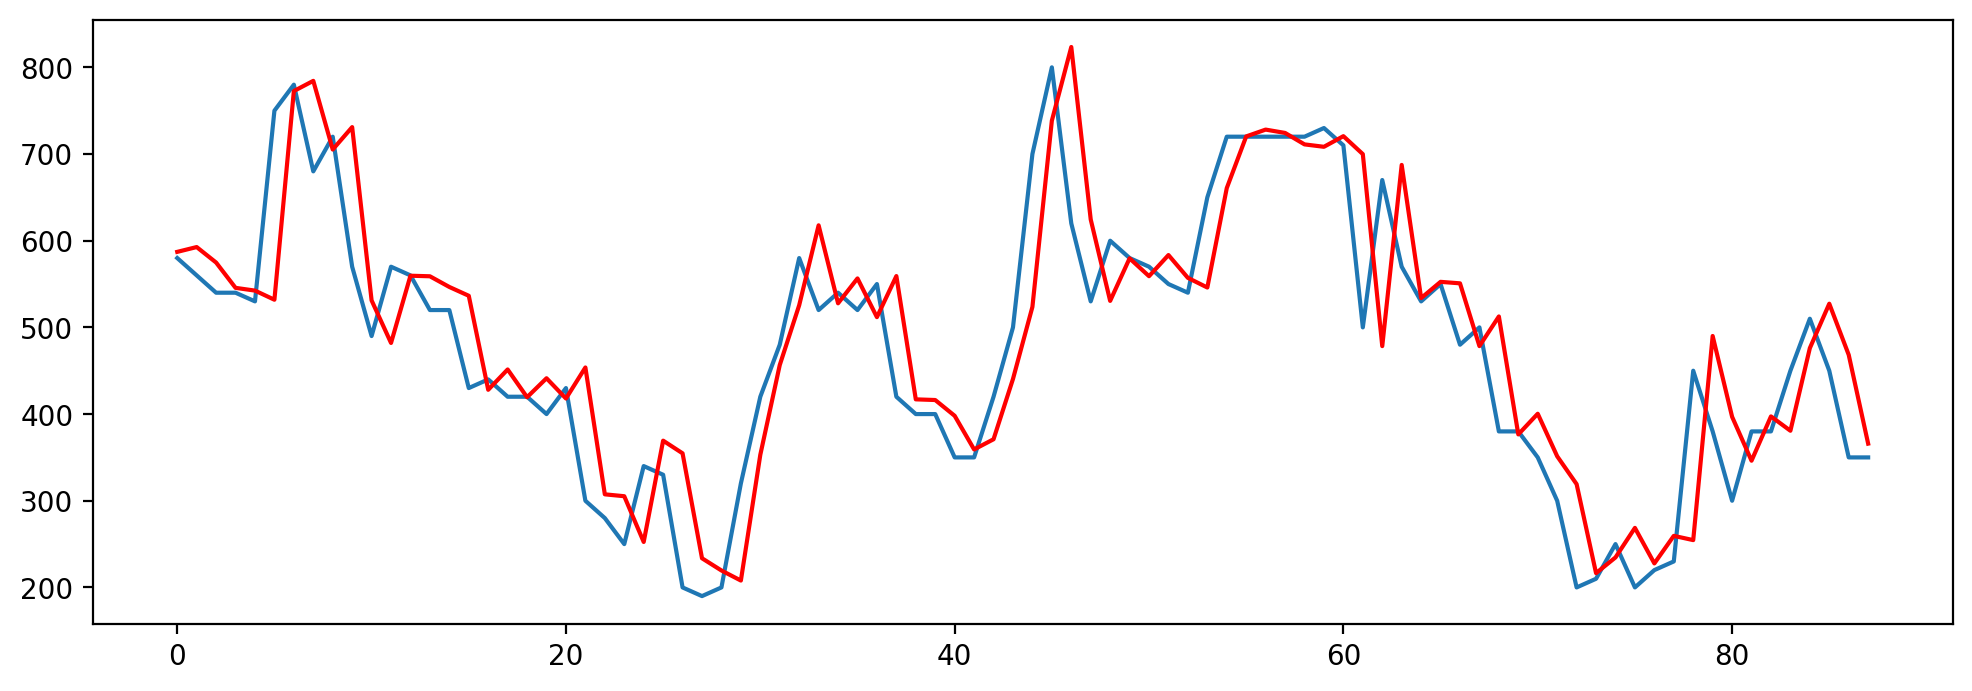

In [6]:
# Biểu đồ So sánh giữa dự báo và tập test

test=scaled.inverse_transform(test)
predictions=scaled.inverse_transform(predictions)

pyplot.figure(figsize=(12,4), dpi=100)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [7]:
#Đến tháng 2/2020 dữ liệu thu thập được 50 ngày
#Du bao từng step với tập 2020
s2020 = read_csv('2020.csv', parse_dates=["Date"], index_col="Date")
s2020.index
s2020=s2020.asfreq("W",method='pad')
s2020=s2020.Price.resample('W').mean()

test_matrix=s2020.values.reshape(-1,1)

test=scaled.fit_transform(test_matrix)


train=scaled_series


history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,4))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predictions

predicted=0.215154, expected=0.062500


predicted=0.057039, expected=0.000000


predicted=0.019187, expected=0.000000


predicted=0.009001, expected=0.125000


predicted=0.154192, expected=0.208333


predicted=0.239745, expected=0.208333


predicted=0.246818, expected=0.375000


predicted=0.413238, expected=1.000000


predicted=1.058554, expected=0.750000


predicted=0.720083, expected=0.479167


predicted=0.578212, expected=0.479167


predicted=0.477883, expected=0.583333


predicted=0.503346, expected=0.375000


predicted=0.309444, expected=0.375000


predicted=0.393160, expected=0.375000


predicted=0.372055, expected=0.437500


predicted=0.437613, expected=0.333333


predicted=0.335993, expected=0.166667


predicted=0.181187, expected=0.208333


predicted=0.238677, expected=0.166667
Test MSE: 0.033


[array([0.21515376]),
 array([0.05703854]),
 array([0.01918749]),
 array([0.00900082]),
 array([0.15419195]),
 array([0.23974457]),
 array([0.24681813]),
 array([0.41323763]),
 array([1.05855353]),
 array([0.7200831]),
 array([0.57821243]),
 array([0.47788253]),
 array([0.50334642]),
 array([0.30944376]),
 array([0.39316045]),
 array([0.3720546]),
 array([0.4376134]),
 array([0.33599312]),
 array([0.18118675]),
 array([0.23867695])]

In [3]:
test=scaled.inverse_transform(test)
predictions=scaled.inverse_transform(predictions)

pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


NameError: name 'scaled' is not defined

In [2]:
output = model_fit.forecast(30)[0]

predictions = list()
for t in range(len(output)):
	x=list()
	x.append(output[t])
	predictions.append(x)
predictions=scaled.inverse_transform(predictions)

pyplot.figure(figsize=(12,5), dpi=80)
pyplot.plot(predictions, color='red')
pyplot.show()
#predictions


NameError: name 'model_fit' is not defined

In [25]:

history = [x for x in output]

history
#history=scaled.inverse_transform(history)

#pyplot.figure(figsize=(12,5), dpi=100)
#pyplot.plot(history, color='red')
#pyplot.show()

[0.23867695263044617,
 0.21824690296921034,
 0.22461087193829757,
 0.25940399545542386,
 0.283731544291328,
 0.3040037606473843,
 0.32089665679400436,
 0.334973555698807,
 0.34670387600955377,
 0.35647878563441254,
 0.36462424591537507,
 0.371411881375452,
 0.3770680375102468,
 0.3817813286717044,
 0.3857089277413295,
 0.38898180733295423,
 0.3917091073020665,
 0.393981774203884,
 0.3958755940642268,
 0.39745371959619996,
 0.39876877613711875,
 0.3998646165317995,
 0.40077778348184945,
 0.40153872812553226]

ValueError: Expected 2D array, got 1D array instead:
array=[0.23867695 0.2182469  0.22461087 0.259404   0.28373154 0.30400376
 0.32089666 0.33497356 0.34670388 0.35647879 0.36462425 0.37141188
 0.37706804 0.38178133 0.38570893 0.38898181 0.39170911 0.39398177
 0.39587559 0.39745372 0.39876878 0.39986462 0.40077778 0.40153873].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.